In [4]:
def insta_searching(word):
    url = "https://www.instagram.com/explore/tags/" + word
    return url

In [5]:
from selenium import webdriver
from selenium.webdriver.common.by import By
#page간에 interval을 주기 위한 것
import time 

driver = webdriver.Chrome('/Users/jeonga/Documents/playdata/chromedriver.exe')
word = "제주도맛집"
url = insta_searching(word)
driver.get(url)

#이때 뜬 창 닫지 않고 다음코드 실행

/var/folders/dl/scvjzdn166d4b4ty875lj28w0000gn/T/ipykernel_47265/319034217.py:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('/Users/jeonga/Documents/playdata/chromedriver.exe')


In [49]:
#첫번째 게시물 선택
def select_first(driver):
    #element는 요소 하나, elements는 여러개
    first = driver.find_element(By.CLASS_NAME, '_aagu')
    first.click()
    #페이지 사이에 3초 대기
    time.sleep(3)
    
select_first(driver)

In [35]:
import re
from bs4 import BeautifulSoup

In [36]:
def get_content(driver):
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
    #본문내용
    try:
        content = soup.select('div._a9zs > h1')[0].text
    except:
        content = ' '
    #태그
    tags = re.findall(r'#[^\s\<]+', content)
    #날짜정보
    date = soup.select('time._aaqe')[0]['datetime'][:10]
    #좋아요 수
    try:
        like = soup.select('div._ae2s._ae3v._ae3w > section._ae5m._ae5n._ae5o > div > div > span > a > span > span')[0].text
    except:
        like = 0
    #장소정보
    try:
        place = soup.select('div._aaqm')[0].text
    except:
        place = ''
    
    data = [content, date, like, place, tags]
    return data
get_content(driver)

['광고) 진심으로 추천해주고 싶은활어회맛집 "노형수산시장"서울의 노량진수산시장이 있다면제주도엔 노형수산시장이 있다!!제주도에서 가장큰 규모의 횟집👍제주도에서 가장 저렴한 횟집👍활어회부터 해산물,대게,구이류까지모든 바다의맛이 한곳에!😍밤에는 포장마차 감성의 야외테라스에서 즐길수있고❤깔끔한 포장으로 언제어디서나즐길수 있는~🥂오늘은 이곳에서 소주각Go👉👉🧭노형수산시장주소 : 제주 제주시 한라대학로 7전화 : 064-745-8822영업시간 : 매일 14:00 ~ 새벽 02:00  새벽 01:00 라스트오더#제주도맛집#제주맛집#제주공항근처횟집#제주횟집#제주도횟집#제주시횟집#제주회포장#제주도회포장#제주횟집추천#노형동맛집#연동맛집#드림타워맛집#이호테우해변맛집',
 '2023-04-03',
 0,
 '',
 ['#제주도맛집#제주맛집#제주공항근처횟집#제주횟집#제주도횟집#제주시횟집#제주회포장#제주도회포장#제주횟집추천#노형동맛집#연동맛집#드림타워맛집#이호테우해변맛집']]

In [37]:
#다음 페이지로 넘어가게 해주는 함수
def move_next(driver):
    right = driver.find_element(By.CLASS_NAME, '_aaqg')
    right.click()
    time.sleep(3)
move_next(driver)
    

In [ ]:
#여러 게시글 수집

In [69]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import re

In [70]:
driver = webdriver.Chrome('/Users/jeonga/Documents/playdata/chromedriver.exe')

/var/folders/dl/scvjzdn166d4b4ty875lj28w0000gn/T/ipykernel_43209/4010636569.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('/Users/jeonga/Documents/playdata/chromedriver.exe')


In [71]:
#word에 수집 원하는 단어 넣어주기

word = "제주데이트"
url = insta_searching(word)

In [72]:
driver.get(url)
time.sleep(3)

In [73]:
select_first(driver)

In [ ]:
results = []
target = 100
for i in range(target):
    try:
        data = get_content(driver)
        results.append(data)
        move_next(driver)
    except:
        time.sleep(2)
        move_next(driver)

print(results[:2])

In [ ]:
#수집 데이터 저장

In [1]:
import pandas as pd

In [ ]:
results_df = pd.DataFrame(results)
results_df.columns = ['content', 'date', 'like', 'place', 'tags']
results_df.to_excel('./crawling/jejuDate.xlsx', index = False)

In [101]:
#여러 키워드로 검색한 결과를 저장하여 통합 저장

In [ ]:
jeju_insta_df = pd.DataFrame([])

folder = './crawling/'
f_list = ['jejudoMatJip.xlsx', 'jejuMatJip.xlsx', 'jejuLocalMatJip.xlsx', 'jejuCafe.xlsx', 'jejuDate.xlsx']

for fname in f_list:
    fpath = folder + fname
    temp = pd.read_excel(fpath)
    jeju_insta_df = jeju_insta_df.append(temp)
    
jeju_insta_df.columns = ['content', 'date', 'like', 'place', 'tags']
jeju_insta_df.drop_duplicates(subset=["content"], inplace = True)
jeju_insta_df.to_excel('./crawling/crawling_jeju.xlsx', index = False)

In [3]:
import pandas as pd
raw_total = pd.read_excel('./crawling/crawling_jeju.xlsx')
raw_total['tags'][:3]

0    ['#제주도맛집#제주맛집#제주공항근처횟집#제주횟집#제주도횟집#제주시횟집#제주회포장#...
1    ['#서귀포맛집', '#제주중문맛집#서귀포횟집#중문횟집#제주도횟집#중문맛집#제주횟집...
2    ['#로컬빌라베이글', '#이태원맛집', '#용산맛집', '#한남동맛집', '#베이...
Name: tags, dtype: object

In [4]:
tags_total = []
for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

In [5]:
from collections import Counter

In [6]:
tag_counts = Counter(tags_total)

In [12]:
tag_counts.most_common(100)

[('', 62),
 ('#제주맛집', 55),
 ('#제주여행', 50),
 ('#제주데이트', 37),
 ('#제주도맛집', 36),
 ('#제주카페', 31),
 ('#제주도', 24),
 ('#제주가볼만한곳', 24),
 ('#서귀포맛집', 22),
 ('#제주핫플', 18),
 ('#제주도여행', 18),
 ('#제주', 17),
 ('#제주공항근처맛집', 17),
 ('#제주도카페', 16),
 ('#애월맛집', 15),
 ('#제주시맛집', 15),
 ('#제주현지인맛집', 15),
 ('#제주카페추천', 15),
 ('#제주도민맛집', 14),
 ('#제주여행코스', 14),
 ('#제주맛집추천', 13),
 ('#제주데이트코스', 13),
 ('#서귀포카페', 12),
 ('#제주핫플레이스', 11),
 ('#제주도데이트', 11),
 ('#제주공항맛집', 11),
 ('#중문맛집', 10),
 ('#애월카페', 9),
 ('#맞팔', 8),
 ('#제주도맛집추천', 8),
 ('#제주숙소', 8),
 ('#협재맛집', 7),
 ('#제주도가볼만한곳', 7),
 ('#맛집', 7),
 ('#제주도여행코스', 7),
 ('#제주도카페추천', 7),
 ('#서귀포데이트', 7),
 ('#먹방', 6),
 ('#먹팔', 6),
 ('#제주살이', 6),
 ('#제주도핫플', 6),
 ('#일상', 6),
 ('#여행', 6),
 ('#좋아요', 6),
 ('#제주여행추천', 6),
 ('#제주펜션', 6),
 ('#제주신상카페', 6),
 ('#서귀포핫플', 6),
 ('#제주흑돼지맛집', 5),
 ('#제주혼밥', 5),
 ('#jeju', 5),
 ('#제주중문맛집', 5),
 ('#제주애월맛집', 5),
 ('#데일리', 5),
 ('#제주공항', 5),
 ('#연동맛집', 5),
 ('#제주공항근처', 5),
 ('#팔로우', 5),
 ('#좋반', 5),
 ('#서귀포카페추천', 5),
 ('#한림카페', 5),
 ('#제주포토존', 5),

In [7]:
#필요없는 단어 정의

STOPWORDS = ['','#일상', '#맞팔', '#먹팔맞팔', '#울산맛집', '#ootd', '#fff', '#먹스타', '#먹스타맞팔', '좋아요반사', '#소통', '#제주포토존', '#먹방', '#먹팔', '#좋아요', '#제주펜션', '#데일리', '#제주숙소', '#팔로우']

tag_total_selected = []
for tag in tags_total:
    if tag not in STOPWORDS:
        tag_total_selected.append(tag)
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(50)

[('#제주맛집', 55),
 ('#제주여행', 50),
 ('#제주데이트', 37),
 ('#제주도맛집', 36),
 ('#제주카페', 31),
 ('#제주도', 24),
 ('#제주가볼만한곳', 24),
 ('#서귀포맛집', 22),
 ('#제주핫플', 18),
 ('#제주도여행', 18),
 ('#제주', 17),
 ('#제주공항근처맛집', 17),
 ('#제주도카페', 16),
 ('#애월맛집', 15),
 ('#제주시맛집', 15),
 ('#제주현지인맛집', 15),
 ('#제주카페추천', 15),
 ('#제주도민맛집', 14),
 ('#제주여행코스', 14),
 ('#제주맛집추천', 13),
 ('#제주데이트코스', 13),
 ('#서귀포카페', 12),
 ('#제주핫플레이스', 11),
 ('#제주도데이트', 11),
 ('#제주공항맛집', 11),
 ('#중문맛집', 10),
 ('#애월카페', 9),
 ('#제주도맛집추천', 8),
 ('#협재맛집', 7),
 ('#제주도가볼만한곳', 7),
 ('#맛집', 7),
 ('#제주도여행코스', 7),
 ('#제주도카페추천', 7),
 ('#서귀포데이트', 7),
 ('#제주살이', 6),
 ('#제주도핫플', 6),
 ('#여행', 6),
 ('#제주여행추천', 6),
 ('#제주신상카페', 6),
 ('#서귀포핫플', 6),
 ('#제주흑돼지맛집', 5),
 ('#제주혼밥', 5),
 ('#jeju', 5),
 ('#제주중문맛집', 5),
 ('#제주애월맛집', 5),
 ('#제주공항', 5),
 ('#연동맛집', 5),
 ('#제주공항근처', 5),
 ('#좋반', 5),
 ('#서귀포카페추천', 5)]

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys
import platform

if sys.platform in ["win32", "win64"]:
    font_name = "malgun gothic"
elif sys.platform == "darwin":
    font_name = "AppleGothic"

rc('font',family=font_name)

In [9]:
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns = ['tags', 'counts']

In [ ]:
pip install wordcloud

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import platform

<Axes: xlabel='counts', ylabel='tags'>

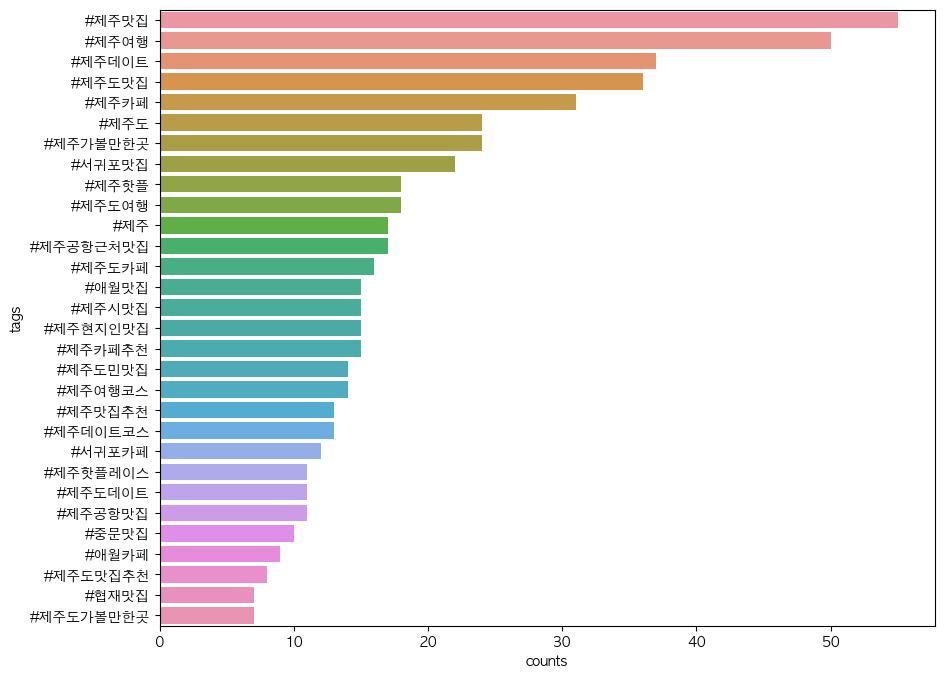

In [11]:
plt.figure(figsize=(10,8))
sns.barplot(x='counts', y='tags', data=tag_counts_df)

In [12]:
if platform.system() == 'Windows':   #윈도우의 경우
    font_path = "c:/Windows/Fonts/malgun.ttf"
elif platform.system() == "Darwin":   #Mac 의 경우
    font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"

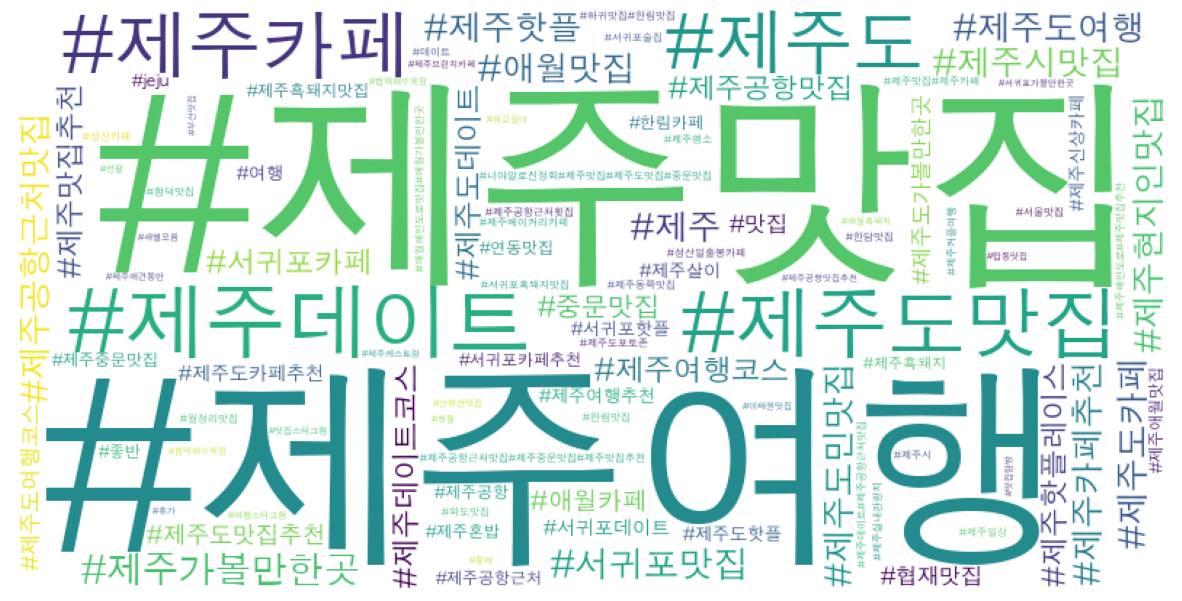

In [13]:
wordcloud = WordCloud(font_path= font_path,	# 사용할 글꼴 경로 
                    background_color="white",	# 배경색
                    max_words=100,		# 최대 몇 개의 단어를 나타낼 것인지 설정
                    relative_scaling= 0.3, 	# 워드 클라우드 내 글자들의 상대적인 크기(0~1)
                    width = 800,		# 워드클라우드 가로
                    height = 400		# 워드클라우드 세로
                 ).generate_from_frequencies(tag_counts_selected)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./crawling/tag-wordcloud.png')

In [14]:
raw_total.head()

,content,date,like,place,tags
0,"광고) 진심으로 추천해주고 싶은활어회맛집 ""노형수산시장""서울의 노량진수산시장이 있다...",2023-04-03,0,NaN,['#제주도맛집#제주맛집#제주공항근처횟집#제주횟집#제주도횟집#제주시횟집#제주회포장#...
1,(광고)제주도에서 쓰끼다시가 가장 잘나오고 서귀포에서 오션뷰로 회를 먹을수있는곳💜💜...,2023-04-04,0,NaN,"['#서귀포맛집', '#제주중문맛집#서귀포횟집#중문횟집#제주도횟집#중문맛집#제주횟집..."
2,[벌꿀+크림치즈] 이조합 안먹어본사람 솔직히 징역감. 그냥 #로컬빌라베이글 이 유죄...,2023-04-04,0,이태원,"['#로컬빌라베이글', '#이태원맛집', '#용산맛집', '#한남동맛집', '#베이..."
3,광고)대게 or 킹크랩 2KG이상 주문시랍스터버터구이 서비스. 포장도 O.K제주공항...,2023-04-03,0,NaN,['#제주도맛집#제주맛집#제주공항근처맛집#제주골프#제주도골프#제주여행#제주도여행#제...
4,(광고)<제주돈아_본점>가족 패밀리들을 위한 30평 대 어린이 놀이시설까지 있는❛제...,2023-04-04,0,NaN,"['#애월맛집', '#애월흑돼지', '#애월흑돼지맛집', '#제주흑돼지', '#애월..."


In [15]:
location_counts = raw_total['place'].value_counts()
location_counts

제주도 제주              19
제주도                  7
퍼플모스 Purple Moss     3
루페이퍼 Rupaper         2
노턴                   2
                    ..
애월                   1
제주에인감귤밭              1
니모메빈티지라운지            1
초록달과자점               1
삼성혈                  1
Name: place, Length: 76, dtype: int64

In [16]:
location_counts_df = pd.DataFrame(location_counts)
location_counts_df

,place
제주도 제주,19
제주도,7
퍼플모스 Purple Moss,3
루페이퍼 Rupaper,2
노턴,2
...,...
애월,1
제주에인감귤밭,1
니모메빈티지라운지,1
초록달과자점,1


In [17]:
location_counts_df.to_excel('./crawling/location_counts.xlsx')

In [18]:
locations=list(location_counts.index)
locations

['제주도 제주',
 '제주도',
 '퍼플모스 Purple Moss',
 '루페이퍼 Rupaper',
 '노턴',
 '제주도 서귀포',
 '제주도 Jeju Island',
 'Jeju-do',
 '환상의 섬 Jeju Island',
 '제주도 제주시',
 '이태원',
 '비밀의숲',
 '바닐라파레트',
 'One and only - 원앤온리 제주',
 '레이오버 제주',
 '불광천',
 '위즈커피',
 '골목커피',
 '제주참숯가마',
 'Baalamb In Jeju',
 '여누카페',
 '보롬왓',
 '애월읍 장전리',
 '카페코지 Cafe Coji',
 '조천읍 와흘리',
 '카페도도다',
 '대흘리',
 '건강과 성 박물관',
 '브라보비치',
 '제주 함덕 서우봉 해변',
 '오션갤러리 호텔앤리조트',
 '손방둥이 공방',
 '제주도애월해안로',
 '제주도 제주시 노형동',
 '카페 노티드 제주 애월 - Cafe Knotted Jeju Aewol',
 '오지하우스:호주식당',
 'Amber Purehill Hotels&Resorts',
 '제주 구좌읍 세화리',
 '제주도 중문',
 '너럭',
 '제주신라면세점',
 'Sinchang Windmill Coastal Road',
 '카페 마노르블랑 제주',
 '경주',
 '제주여행',
 'Palgil',
 '함덕해수욕장',
 '맛집탐방',
 '성읍탐라식당',
 'Jeju Island,Korea',
 '제주신화월드',
 '금능해수욕장',
 '섭섭이네',
 '묵전 제주',
 '동백포레스트',
 '닭머르',
 '별방진',
 '제주도 한경면',
 '석 인 장 碩 仁 張',
 '제주시 조천읍 와산리',
 '이월드 (E-WORLD)',
 '제주도제주시 삼화지구',
 '숙성도',
 '제주도 애월읍',
 '이층빵집 굽는아방',
 '사이카레',
 '서귀포 쌍둥이 횟집',
 '옹포리',
 '키친요디2호관',
 '동문시장 Dongmoon Market 東門水産市場',
 'wiee.jeju',
 '애월',
 '제주에인감귤밭',


In [19]:
import requests

In [20]:
searching = '합정 스타벅스'

url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)
headers = {
    "Authorization":"KakaoAK 338e0f8c37e15e76cf56ba7585ed01d5"
}

places = requests.get(url, headers = headers).json()['documents']
places

[{'address_name': '서울 마포구 합정동 472',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '2057327896',
  'phone': '1522-3232',
  'place_name': '스타벅스 합정점',
  'place_url': 'http://place.map.kakao.com/2057327896',
  'road_address_name': '서울 마포구 월드컵로1길 14',
  'x': '126.91253700818196',
  'y': '37.54994959743763'},
 {'address_name': '서울 마포구 합정동 473',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '2132676511',
  'phone': '1522-3232',
  'place_name': '스타벅스 합정푸르지오점',
  'place_url': 'http://place.map.kakao.com/2132676511',
  'road_address_name': '서울 마포구 월드컵로3길 14',
  'x': '126.91247704039314',
  'y': '37.550909116022105'},
 {'address_name': '서울 마포구 서교동 490',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '288597324',
  'phone': '1522-3232',

In [21]:
def find_places(searching):
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)
    headers = {
        "Authorization": "KakaoAK 338e0f8c37e15e76cf56ba7585ed01d5"
    }

    places = requests.get(url, headers = headers).json()['documents']
    place = places[0]

    name = place['place_name']
    x = place['x']
    y = place['y']
    data = [name, x, y, searching]
    return data

In [23]:
from tqdm import tqdm_notebook

In [24]:
import time
locations_inform = []
for location in tqdm_notebook(locations):
    try:
        data = find_places(location)
        locations_inform.append(data)
        time.sleep(0.5)
    except:
        pass
locations_inform

/var/folders/dl/scvjzdn166d4b4ty875lj28w0000gn/T/ipykernel_47519/60451310.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for location in tqdm_notebook(locations):


  0%|          | 0/76 [00:00<?, ?it/s]

[['제주도', '126.54587355630036', '33.379777816446165', '제주도 제주'],
 ['제주도', '126.54587355630036', '33.379777816446165', '제주도'],
 ['노턴', '127.48756687650614', '36.63793879189138', '노턴'],
 ['올레길 7코스(서귀포-월평 올레)', '126.51530966206293', '33.23738579332568', '제주도 서귀포'],
 ['제주도', '126.54587355630036', '33.379777816446165', '제주도 Jeju Island'],
 ['올레길 18코스(제주원도심-조천 올레)',
  '126.58214303914238',
  '33.52522810308715',
  '제주도 제주시'],
 ['이태원거리', '126.99580922812', '37.5345613066561', '이태원'],
 ['비밀의숲', '126.75493209633262', '33.45360917744684', '비밀의숲'],
 ['바닐라파레트', '126.480579828486', '33.4771172717429', '바닐라파레트'],
 ['원앤온리', '126.319192490757', '33.2392223486155', 'One and only - 원앤온리 제주'],
 ['레이오버', '126.812358181761', '33.5586485959582', '레이오버 제주'],
 ['불광천', '126.906234509821', '37.5800209041095', '불광천'],
 ['위즈커피', '126.432128534267', '33.4874749915111', '위즈커피'],
 ['골목커피', '126.373756993927', '34.8035129331836', '골목커피'],
 ['제주참숯가마찜질방', '126.86341600718973', '33.369142317425506', '제주참숯가마'],
 ['여누카페', 

In [26]:
locations_inform_df = pd.DataFrame(locations_inform)
locations_inform_df.columns = ['name_official', '경도', '위도', '인스타위치명']
locations_inform_df.to_excel('./crawling/locations.xlsx', index = False)

In [29]:
location_counts_df = pd.read_excel('./crawling/location_counts.xlsx', index_col=0)
locationfs_inform_df = pd.read_excel('./crawling/locations.xlsx')

In [37]:
location_data = pd.merge(locations_inform_df, location_counts_df, how='inner', left_on='name_official', right_index=True)
location_data.head()

In [46]:
#같은 것끼리 합쳐주기

location_data = location_data.pivot_table(index=['name_official', '경도', '위도'], values = 'place', aggfunc='sum')
location_data.head(10)

,,,place
name_official,경도,위도,
골목커피,126.373757,34.803513,1
금능해수욕장,126.235890,33.390449,1
너럭,126.508814,33.516197,1
노턴,127.487567,36.637939,2
닭머르,126.611897,33.536475,1
동백포레스트,126.636198,33.300308,1
바닐라파레트,126.480580,33.477117,1
별방진,126.882899,33.526772,1
보롬왓,126.752496,33.413497,1


In [53]:
location_data = location_data.reset_index()

In [54]:
location_data.to_excel('./crawling/location_inform.xlsx')

In [55]:
location_data = pd.read_excel('./crawling/location_inform.xlsx')
location_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     25 non-null     int64  
 1   name_official  25 non-null     object 
 2   경도             25 non-null     float64
 3   위도             25 non-null     float64
 4   place          25 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 1.1+ KB


In [ ]:
pip install folium

In [ ]:
import folium

Mt_Hanla = [33.362500, 126.533694]
map_jeju = folium.Map(location = Mt_Hanla, zoom_start = 11)

for i in range(len(location_data)):
    name = location_data ['name_official'][i]
    count = location_data ['place'][i]
    size = int(count)*2
    long = float(location_data['위도'][i])
    lat = float(location_data['경도'][i])
    
    folium.CircleMarker((long,lat), radius = size, color = 'red', popup=name).add_to(map_jeju)

map_jeju

In [47]:
map_jeju.save('./crawling/jeju.html')

In [48]:
from folium.plugins import MarkerCluster

In [64]:
locations = []
names = []
for i in range(len(location_data)):
    data = location_data.iloc[i]
    locations.append((float(data['위도']), float(data['경도'])))
    names.append(data['name_official'])
icon_create_function = """
    function(cluster){
        return L.divIcon({
        html:'<b>' + cluster.getChildCount() + '</b>', 
        className: 'marker-cluster marker-cluster-large', 
        iconsize: new L.Point(30,30)
        });
    }
"""

In [65]:
Mt_Hanla = [33.362500, 126.533694]
map_jeju2 = folium.Map(location = Mt_Hanla, zoom_start = 11)

In [66]:
marker_cluster = MarkerCluster(
    locations = locations,
    popups = names,
    name = 'Jeju',
    overlay = True, 
    control = True,
    icon_create_function = icon_create_function
)

In [ ]:
marker_cluster.add_to(map_jeju2)
folium.LayerControl().add_to(map_jeju2)
map_jeju2

In [69]:
map_jeju2.save('./crawling/jeju_cluster.html')